# Spurious Correlation

In this simple example we investigate how the the way we record data can have a large impact on the conclusions we can draw from data.

We use the example of two simple dice and simulate rolling the dice with the random number generator in NumPy ```np.random.choice``` that returns one of the numbers listed in the arguments randomly.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Two (simple) Dice

Imagine we have two six-sided dice and roll them.
If we either roll them one after the the other, or both at the same time:
In either case we expect that each number appears with the same frequency and that there is no dependency between them.

In [71]:
# roll the dice n times
n_random = 10000
dice_1 = np.random.choice([1,2,3,4,5,6], n_random) 
dice_2 = np.random.choice([1,2,3,4,5,6], n_random) 
corr = np.corrcoef(x=dice_1, y=dice_2)
print('Corrleation: {}'.format(corr))

Corrleation: [[1.         0.00711734]
 [0.00711734 1.        ]]


Apart from small numerical fluctuations, the two set of random numbers are uncorrelated, as we expect.

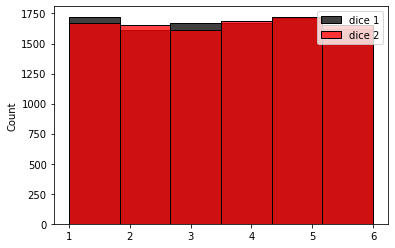

In [72]:
sns.histplot(dice_1, label='dice 1', color='k', bins=6)
sns.histplot(dice_2, label='dice 2', color='r', bins=6)
plt.legend()
plt.show()

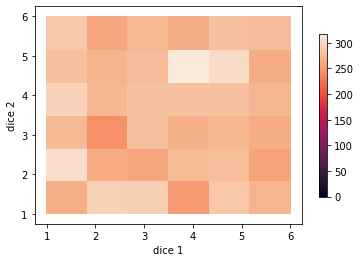

In [73]:
sns.histplot(x=dice_1, y=dice_2, bins=6,
             cbar=True, cbar_kws=dict(shrink=.75),
             cmap='rocket')
plt.xlabel('dice 1')
plt.ylabel('dice 2')
plt.show()

# With Intervention

Now we do the same thing but only record the numbers if one of the dice shows either a 5 or a 6.

In [79]:
dice_1 = []
dice_2 = []
for i in (np.arange(n_random)):
  d_1 = np.random.choice([1,2,3,4,5,6], 1) 
  d_2 = np.random.choice([1,2,3,4,5,6], 1) 

  if d_1 == 5 or d_1 == 6 or d_2 == 5 or d_2 == 6:
    dice_1.append(d_1[0])
    dice_2.append(d_2[0])

Now we compute the correlation between the two set of numbers.
The two numbers are now strongly correlated.

This is not surprising, because we changed the way we recorded the data:
We only record the outcomes of the two dice if one of them shows a 5 or a 6.
Hence, we expect that we observe these two numbers in the final set of recorded values much more frequently than any other value - and we do see this in the plot below.
All other numbers occur as well - but we do not observe them as frequently as we see the numbers 5 and 6.

In [85]:
corr = np.corrcoef(x=np.array(dice_1), y=np.array(dice_2))
print('Corrleation: {}'.format(corr))

Corrleation: [[ 1.         -0.50814839]
 [-0.50814839  1.        ]]


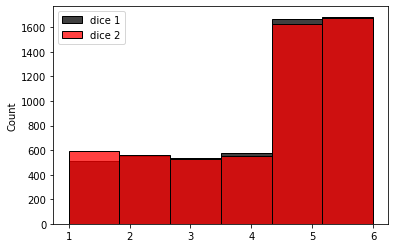

In [82]:
sns.histplot(dice_1, label='dice 1', color='k', bins=6)
sns.histplot(dice_2, label='dice 2', color='r', bins=6)
plt.legend()
plt.show()

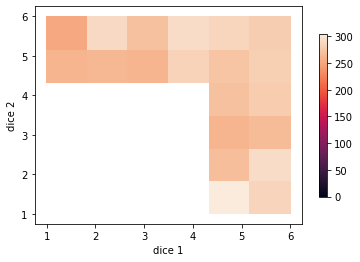

In [83]:
sns.histplot(x=dice_1, y=dice_2, bins=6,
             cbar=True, cbar_kws=dict(shrink=.75),
             cmap='rocket')
plt.xlabel('dice 1')
plt.ylabel('dice 2')
plt.show()

When we think about this in the sequence: We change the way we record the data, and then we observe a change in the outcome, it seems obvious what is happening and why.

However, in other situations, we start from a very different premise:
We obtain the data (or are given the data) and we may not know the data were acquired,

For example, imagine the task of a (novice) data scientist who is given the data we have generated above and is tasked with building a prediction model or using machine learning based on these data. In this case, we would easily conclude that the two variables are correlated and have a distribution skewed to high values.
With our knowledge "behind the scenes" we know that these effects are just artefacts from the way we obtain the data.

This highlights the importance of understanding not only where the data we use comes from, but also how it was recorded and which potential issues may arise from this setup.